# Desafio - Regularización

#### lunes 06 de julio 2020

----

## Problema 1 - Preparación del ambiente de trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, mean_absolute_error

df = pd.read_csv('winequality-red.csv')

plt.style.use('seaborn')                
plt.rcParams['figure.figsize'] = (15,20)  

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Problema 2 - Análisis exploratorio

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Los datos son todos numéricos. Exceptuando por la variable objetivo, que para este caso es calidad, de tipo descreta, los restantes datos son de tipo continuos.

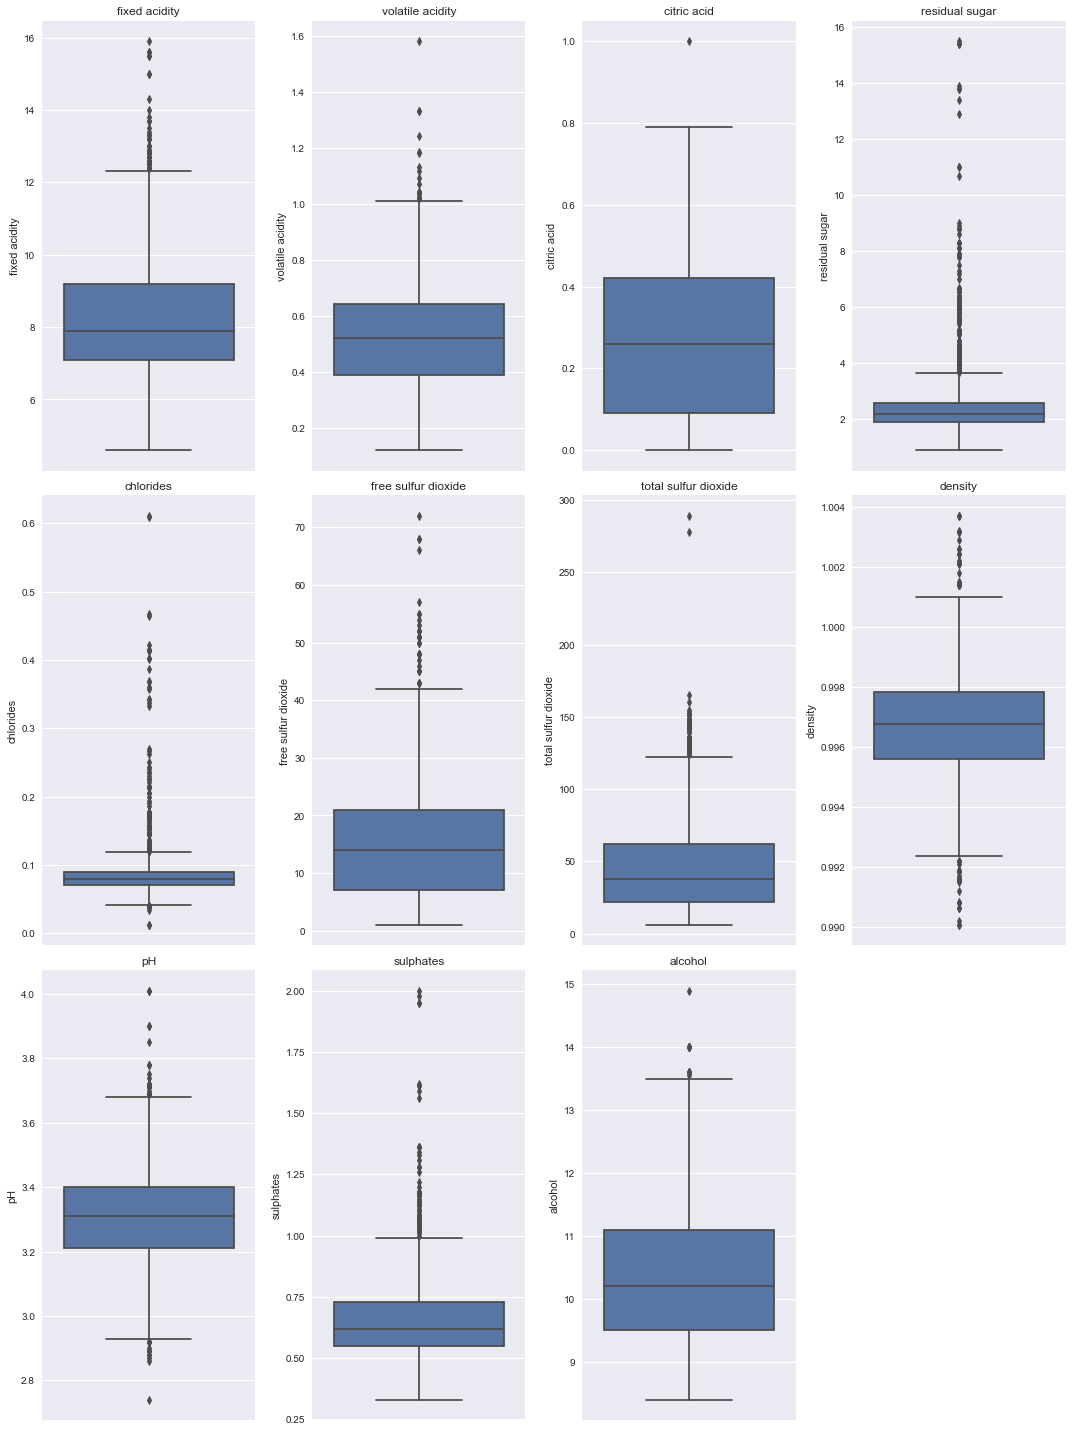

In [4]:
df_float = df.select_dtypes(include=['float64'])   #selecciona solo un tipo de dato
for n, i in enumerate(df_float):
    plt.subplot(3, 4, n+1)
    sns.boxplot(df_float[i], orient='v')
    plt.title(i)
    plt.xlabel("")

plt.tight_layout()

Se observa que hay presencia importante de outliers, en todos los atributos, excepto en citric acid. Los atributos que aparentemente tienen una mayor presencia de datos fuera de serie son: residual sugar, chlorides, total sulfur dioxide, sulphates, los cuales están alejados de los valores mínimos (sobre Q3). Por otra parte, el atributo density, también posee outliers, pero en ambos extremos(bajo Q1 y sobre Q3).

En cuanto al atributo chlorides, se observa que su distancia intercuartílico Q1-Q3 es la que posee el menor rango. En contraparte, citric acid es el atributo con mayor rango Q1-Q3.

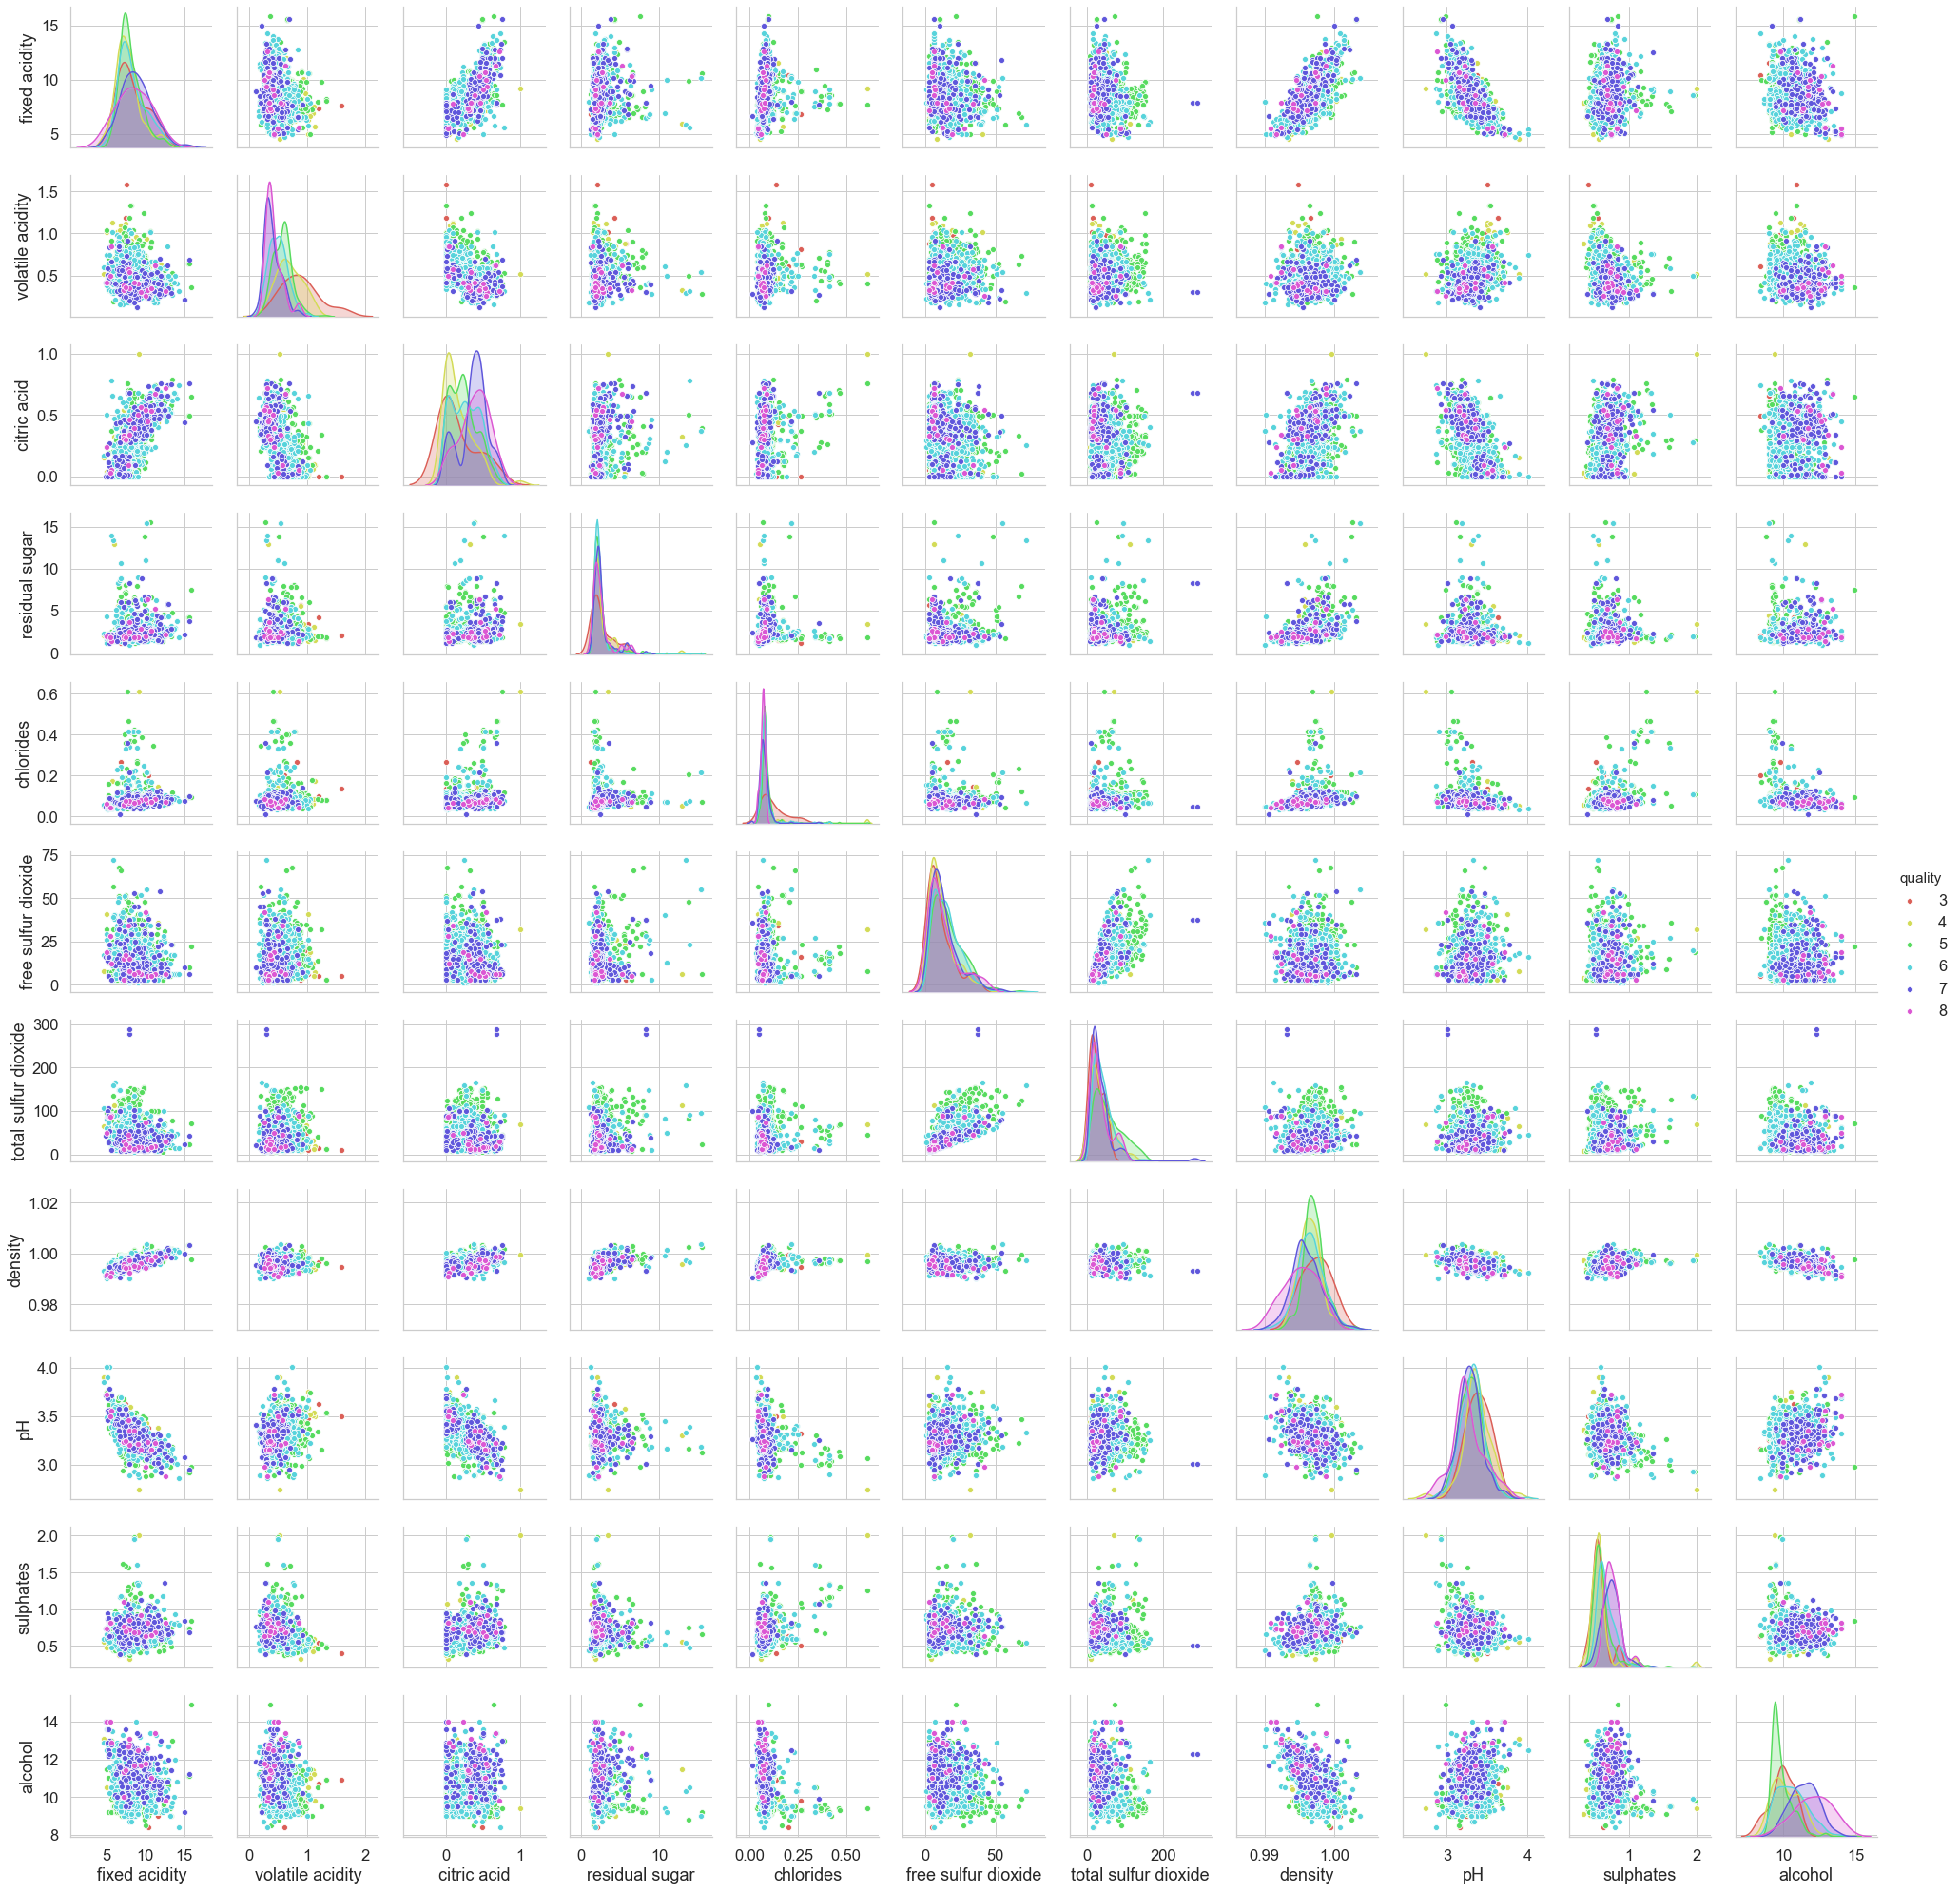

In [8]:
sns.set(style="whitegrid", font_scale=1.5)
sns.pairplot(data=df,hue='quality',palette='hls')

Al observar el gráficos de dispersión entre las variables y la calidad, se distingue sulfur dioxide tiene 2 outliers distantes de ambos ejes. También Sulphates, mantiene los aotuliers vistos en su gráfico individual, al interactuar con las otras variables.

Residual Sugar, muestra una gran dispersión en sus datos y presencia de outliers cecanos a ambos ejes.

## Problema : Regularización de modelos

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'fixed acidity':'alcohol'],df['quality'], test_size=.33, random_state=1001)

In [11]:
X_train = StandardScaler().fit_transform(X_train)

X_test = StandardScaler().fit_transform(X_test)

In [12]:
ridge_cv = RidgeCV(cv = 10).fit(X_train, y_train)
model_ridge = ridge_cv.fit(X_train, y_train)
y_predict_ridge_cv = model_ridge.predict(X_test)

In [13]:
lasso_cv = LassoCV(cv = 10).fit(X_train, y_train)
model_lasso = lasso_cv.fit(X_train, y_train)
y_predict_lasso_cv = model_lasso.predict(X_test)

In [14]:
elastic_cv = ElasticNetCV(cv = 10).fit(X_train, y_train)
model_elastic = elastic_cv.fit(X_train, y_train)
y_predict_elastic_cv = model_elastic.predict(X_test)

In [15]:
a_ridge = model_ridge.alpha_
a_lasso = model_lasso.alpha_
a_elastic = model_elastic.alpha_

c_ridge = model_ridge.coef_
c_lasso = model_lasso.coef_
c_elastic = model_elastic.coef_

ridge_median_ae = median_absolute_error(y_test, y_predict_ridge_cv)
lasso_median_ae = median_absolute_error(y_test, y_predict_lasso_cv)
elastic_median_ae = median_absolute_error(y_test, y_predict_elastic_cv)

ridge_mean_ae = mean_absolute_error(y_test, y_predict_ridge_cv)
lasso_mean_ae= mean_absolute_error(y_test, y_predict_lasso_cv)
elastic_mean_ae= mean_absolute_error(y_test, y_predict_elastic_cv)

ridge_rmse = mean_squared_error(y_test, y_predict_ridge_cv)
lasso_rmse = mean_squared_error(y_test, y_predict_lasso_cv)
elastic_rmse = mean_squared_error(y_test, y_predict_elastic_cv)

In [16]:
print('Alpha')
print('Ridge:\t\t',a_ridge)
print('ElasticNet:\t',a_lasso)
print('Lasso:\t\t',a_elastic,'\n')

print('Coeficientes')
print(df.columns[:-1])
print('Ridge:\n',c_ridge,'\n')
print('ElasticNet:\n',c_lasso,'\n')
print('Lasso:\n',c_elastic,'\n')

Alpha
Ridge:		 10.0
ElasticNet:	 0.017775967118957365
Lasso:		 0.033155852858451386 

Coeficientes
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Ridge:
 [ 0.07356815 -0.21373431 -0.03102872  0.01785882 -0.07650272  0.03913423
 -0.10216067 -0.05351615 -0.02515099  0.16668738  0.27352272] 

ElasticNet:
 [ 0.01088345 -0.21065228  0.          0.         -0.05427379  0.
 -0.06281796 -0.         -0.01592153  0.136864    0.28846588] 

Lasso:
 [ 0.01197798 -0.2084746   0.          0.         -0.05561277  0.
 -0.06360652 -0.         -0.01627546  0.13708904  0.28504262] 




El alpha más alto figura para el modelo Ridge. Por otra parte se puede observar que tanto ElasticNet como Lasso, tienen 4 atributos con valores en 0, respecto a Ridge, lo cual aportará menos información para la estimación de los valores predichos. Los dos valores inferiores de alpha, se corresponden a las regresiones que más penalizan a los atributos.

Los atributos que están en 0, tanto en ElasticNET y Lasso, son: residual sugar, chlorides, total sulfur dioxide y density, en los cuales se visualizaban una gran cantidad de outliers en los gráficos anteriores.






In [17]:
print('Median Absolute Error')
print('Ridge:\t\t',ridge_median_ae)
print('ElasticNet:\t',elastic_median_ae)
print('Lasso:\t\t',lasso_median_ae,'\n')

print('Mean Absoluta Error')
print('Ridge:\t\t',ridge_mean_ae)
print('ElasticNet:\t',elastic_mean_ae)
print('Lasso:\t\t',lasso_mean_ae,'\n')

print('RMSE')
print('Ridge:\t\t',ridge_rmse)
print('ElasticNet:\t',lasso_rmse)
print('Lasso:\t\t',elastic_rmse)


Median Absolute Error
Ridge:		 0.3802813595619221
ElasticNet:	 0.4033005418518498
Lasso:		 0.4038425844673412 

Mean Absoluta Error
Ridge:		 0.5084991333806411
ElasticNet:	 0.5162774895629934
Lasso:		 0.5162108327525835 

RMSE
Ridge:		 0.43436690250931875
ElasticNet:	 0.4390074298914321
Lasso:		 0.4387872824358771


El Median Absolute Error, que posee el mejor desempeño es el de Ridge, sin mebargo hay que tener en cuenta la gran cantidad de outliers, lo que puede estar afectando el resultado del MAE.

En cuanto al error absluto, también el modelo Ridge, presenta un mejor desempeño respecto a los otros dos modelos. 

En el caso del RMSE, que penaliza aún más los errores, el modelo Ridge, también es el que menor error presenta. Considerando los anteriores resultados, el modelo que mejor puede predecir sería Ridge, ya que además rescata una mayor cantidad de atributos con un buen desempeño.